In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
import datetime as dt

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
#3.Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()
print(results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','temperatures'])
df.set_index(df['date'], inplace=True)
print(df)

                  date  temperatures
date                                
2010-06-01  2010-06-01          78.0
2010-06-02  2010-06-02          76.0
2010-06-03  2010-06-03          78.0
2010-06-04  2010-06-04          76.0
2010-06-05  2010-06-05          77.0
...                ...           ...
2017-06-26  2017-06-26          79.0
2017-06-27  2017-06-27          74.0
2017-06-28  2017-06-28          74.0
2017-06-29  2017-06-29          76.0
2017-06-30  2017-06-30          75.0

[1700 rows x 2 columns]


In [9]:
df = df.sort_index()
print(df.to_string(index=False))

      date  temperatures
2010-06-01          78.0
2010-06-01          73.0
2010-06-01          77.0
2010-06-01          69.0
2010-06-01          76.0
2010-06-01          71.0
2010-06-01          74.0
2010-06-01          70.0
2010-06-01          74.0
2010-06-02          78.0
2010-06-02          70.0
2010-06-02          76.0
2010-06-02          76.0
2010-06-02          71.0
2010-06-02          76.0
2010-06-02          76.0
2010-06-02          72.0
2010-06-02          76.0
2010-06-03          74.0
2010-06-03          78.0
2010-06-03          73.0
2010-06-03          72.0
2010-06-03          77.0
2010-06-03          76.0
2010-06-03          75.0
2010-06-03          78.0
2010-06-03          67.0
2010-06-04          73.0
2010-06-04          75.0
2010-06-04          75.0
2010-06-04          76.0
2010-06-04          73.0
2010-06-04          68.0
2010-06-04          72.0
2010-06-04          70.0
2010-06-04          74.0
2010-06-05          73.0
2010-06-05          77.0
2010-06-05          78.0


In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()
print (df)

                  date  temperatures
date                                
2010-06-01  2010-06-01          78.0
2010-06-01  2010-06-01          73.0
2010-06-01  2010-06-01          77.0
2010-06-01  2010-06-01          69.0
2010-06-01  2010-06-01          76.0
...                ...           ...
2017-06-30  2017-06-30          76.0
2017-06-30  2017-06-30          75.0
2017-06-30  2017-06-30          75.0
2017-06-30  2017-06-30          74.0
2017-06-30  2017-06-30          75.0

[1700 rows x 2 columns]


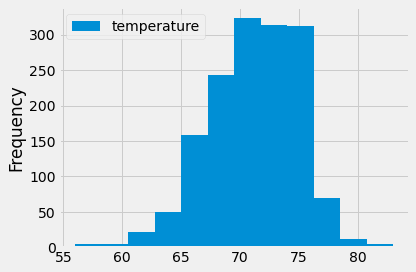

In [30]:
# Histogram
df.plot.hist(bins=12)
plt.tight_layout()

In [31]:
df1_list = []
def df_to_df1(df1_list):

# make a list of dataframes
    for df1 in df_list:
        df1_list.append(pd.read_df(y, header=None,names=['Date', 'Temp'],  delimiter='\t'))
        print(df1_list)

## D2: Determine the Summary Statistics for December

In [32]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [33]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()
print(results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [34]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['date','temperature'])
df.set_index(df['date'], inplace=True)

In [35]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()
print (df)

                  date  temperature
date                               
2010-12-01  2010-12-01         76.0
2010-12-03  2010-12-03         74.0
2010-12-04  2010-12-04         74.0
2010-12-06  2010-12-06         64.0
2010-12-07  2010-12-07         64.0
...                ...          ...
2016-12-27  2016-12-27         71.0
2016-12-28  2016-12-28         71.0
2016-12-29  2016-12-29         69.0
2016-12-30  2016-12-30         65.0
2016-12-31  2016-12-31         65.0

[1517 rows x 2 columns]


In [36]:
df = pd.DataFrame(results, columns = ['date','temperature'])
print(df)

            date  temperature
0     2010-12-01         76.0
1     2010-12-03         74.0
2     2010-12-04         74.0
3     2010-12-06         64.0
4     2010-12-07         64.0
...          ...          ...
1512  2016-12-27         71.0
1513  2016-12-28         71.0
1514  2016-12-29         69.0
1515  2016-12-30         65.0
1516  2016-12-31         65.0

[1517 rows x 2 columns]


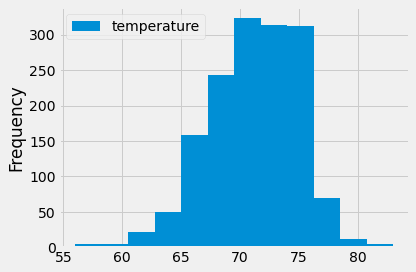

In [37]:
# Histogram
df.plot.hist(bins=12)
plt.tight_layout()

In [38]:
df2_list = []
def df_to_df2(df2_list):

# make a list of dataframes
    
    for df2 in df_list:
        df2_list.append(pd.read_df(y, header=None,names=['Date', 'Temp'],  delimiter='\t'))
        df2 = df2.sort_index()
        print(df2.to_string(index=False))

In [25]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["June", "December"]
df_data = [df1, df2]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('June and December Temperature Statistics (2010-2016)',fontsize=20)
ax.set_ylabel('Temperature',fontsize=14)
ax.set_xlabel("Months",fontsize=14)
ax.boxplot(df_data, labels=x_labels)
ax.set_yticks(np.arange(50, 90, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("June and December Temperature Statistics.png")
plt.show()

NameError: name 'df1' is not defined

NameError: name 'date' is not defined

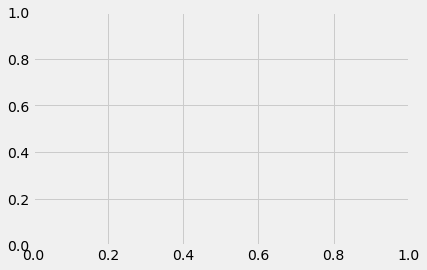

In [26]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Date"]
fig, ax = plt.subplots()
x=range(len(date))
ax.boxplot(df,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Stats for Dec(2010-2016)')
ax.set_ylabel('Temperature')
ax.set_yticks(np.arange(65, 78, step=2.0))
ax.grid()
plt.show()

<AxesSubplot:>

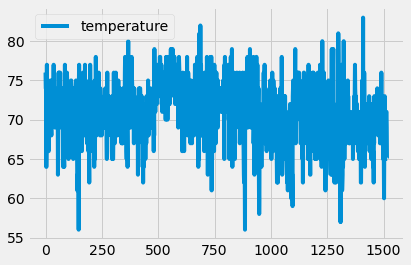

In [27]:
df.plot()

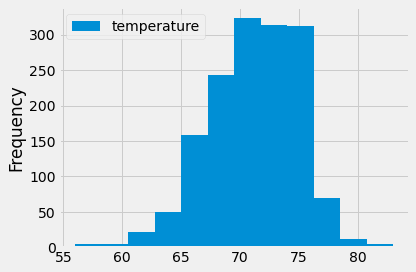

In [28]:
# Histogram
df.plot.hist(bins=12)
plt.tight_layout()